# Trabajo práctico integrador

**Nombre**: Yessika Arrieta

## Primera Parte (Clase 1 y 2)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Primer ejercicio

Dada una matriz en formato *numpy array*, donde cada fila de la matriz representa un vector matemático, se requiere computar las normas $l_0$, $l_1$, $l_2$, $l_{\infty}$, según la siguientes definiciones:

\begin{equation}
    ||\mathbf{x}||^{p} = \bigg(\sum_{j=1}^{n}{|x_i|^p}\bigg)^{\frac{1}{p}}
\end{equation}

con los casos especiales para $p=0$ y $p=\infty$ siendo:

\begin{equation}
    \begin{array}{rcl}
        ||\mathbf{x}||_0 & = & \bigg(\sum_{j=1 \wedge x_j != 0}{|x_i|}\bigg)\\
        ||\mathbf{x}||_{\infty} & = & \max_{i}{|x_i|}\\
    \end{array}
\end{equation}

### Segundo Ejercicio

En clasificación contamos con dos arreglos, la “verdad” y la “predicción”. Cada elemento de los arreglos pueden tomar dos valores, “True” (representado por 1) y “False” (representado por 0). Entonces podemos definir 4 variables:

* True Positive (TP): El valor verdadero es 1 y el valor predicho es 1
* True Negative (TN): El valor verdadero es 0 y el valor predicho es 0
* False Positive (FP): El valor verdadero es 0 y el valor predicho es 1
* False Negative (FN): El valor verdadero es 1 y el valor predicho es 0

A partir de esto definimos:

* Precision = TP / (TP + FP)
* Recall = TP / (TP + FN)
* Accuracy = (TP + TN) / (TP + TN + FP + FN)
 
Calcular las 3 métricas con Numpy y operaciones vectorizadas.

In [351]:
     truth = np.array([1,1,0,1,1,1,0,0,0,1])
prediction = np.array([1,1,1,1,0,0,1,1,0,0])

In [352]:
tp = np.sum(np.logical_and(prediction == 1, truth == 1))
tp

3

In [353]:
tn = np.sum(np.logical_and(prediction == 0, truth == 0))
tn

1

In [354]:
fp = np.sum(np.logical_and(prediction == 1, truth == 0))
fp

3

In [355]:
fn = np.sum(np.logical_and(prediction ==0, truth == 1))
fn

3

In [356]:
precision= tp/(tp+fp)
#operacion con suma y division de vector
#precision= np.divide(tp,np.add(tp,fp))
print(precision)
type(precision)

0.5


numpy.float64

In [357]:
from sklearn.metrics import precision_score
a= precision_score( truth,prediction)
print(a)

0.5


In [358]:
recall= tp/(tp+fn)
print(recall)
type(recall)

0.5


numpy.float64

In [359]:
from sklearn.metrics import recall_score
recall_score(truth, prediction)

0.5

In [360]:
accuracy= (tp+tn)/(tp+tn+fp+fn)
print(accuracy)
type(accuracy)

0.4


numpy.float64

In [361]:
from sklearn.metrics import accuracy_score
accuracy_score(truth, prediction)


0.4

### Tercer y Cuarto Ejercicio

Para este ejercicio vamos a considerar los siguientes datasets:

* [HAR](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones) (Ejercicio 3)
* [MNIST](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) (Ejercicio 4)

1. Aplicar PCA (validar que se cumplan las condiciones), ¿Cuántas componentes necesitamos para explicar el 80% de la varianza?
2. Gráficar la variación acumulada para cada caso.
3. Utilizando [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html). Agrupar el dataset transformado (ejercicio de PCA) y agrupar en clusters de $k=6$ (ej 3) y $k=10$ (ej 4). Luego en ambos casos probar con $k=2$.
4. Graficar los resultados con los distintos k's usando las primeras dos componentes principales como ejes x,y.
5. Explique. ¿Cuál fue la ganancia de usar PCA en conjunto con k-means?

##### HAR

In [362]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm_notebook
from sklearn.datasets import load_digits

%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.family'] = 'DejaVu Sans'

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

RANDOM_STATE = 17

In [363]:
PATH_DATASET = "../tp_integrador_enunciado/data/HAR_Dataset/train"


In [364]:
X_train = np.loadtxt(os.path.join(PATH_DATASET, "X_train.txt"))
y_train = np.loadtxt(os.path.join(PATH_DATASET, "y_train.txt")).astype(int)

In [365]:
# Aplicar PCA (validar que se cumplan las condiciones), ¿Cuántas componentes necesitamos para explicar el 80% de la varianza?

#validar que se cumplan las condiciones:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

#¿Cuántas componentes necesitamos para explicar el 80% de la varianza?
pca = PCA(n_components=0.8, random_state=RANDOM_STATE).fit(X_scaled)
X_pca = pca.transform(X_scaled)

In [366]:
X_pca.shape

(7352, 26)

In [367]:
# Cantidad de componentes necesarios
X_pca.shape[1]

26

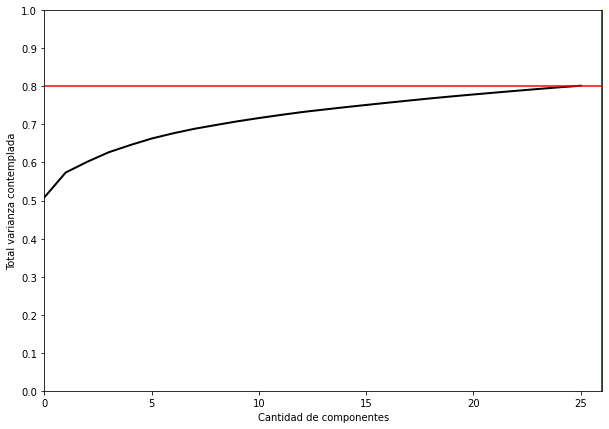

In [368]:
#Gráficar la variación acumulada para cada caso.
pca_2 = PCA(n_components=26, random_state=RANDOM_STATE).fit(X_scaled)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca_2.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Cantidad de componentes')
plt.ylabel('Total varianza contemplada')
plt.xlim(0, 26)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(26, c='b')
plt.axhline(0.8, c='r')
plt.show();

In [369]:
#KMeans k=6
kmeans_move = KMeans(n_clusters=6, n_init=100, random_state=RANDOM_STATE)
kmeans_move.fit(X_pca)
cluster6_labels_mov = kmeans_move.labels_

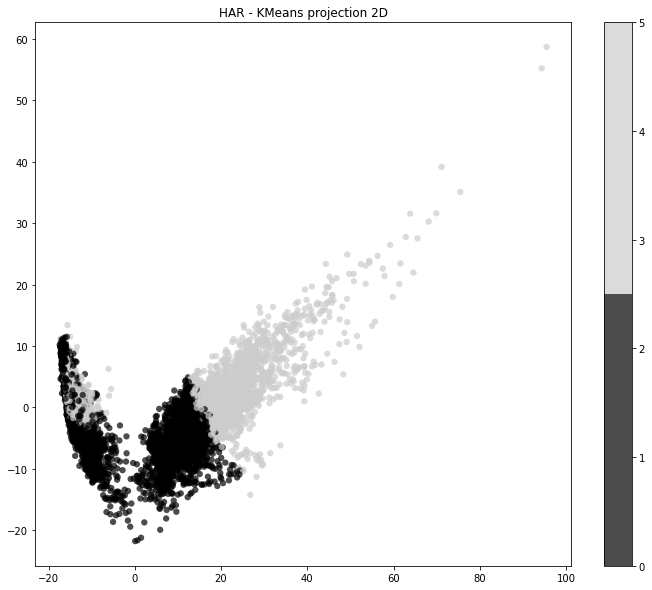

In [370]:
#Graficar los resultados con los distintos k's usando las primeras dos componentes principales como ejes x,y.
# Graficamos los primeros dos componentes - clusters id
plt.figure(figsize=(12,10))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster6_labels_mov, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 2))
plt.colorbar()
plt.title('HAR - KMeans projection 2D');

In [371]:
#KMeans k=2
kmeans_move = KMeans(n_clusters=2, n_init=100, random_state=RANDOM_STATE)
kmeans_move.fit(X_pca)
cluster2_labels_mov = kmeans_move.labels_

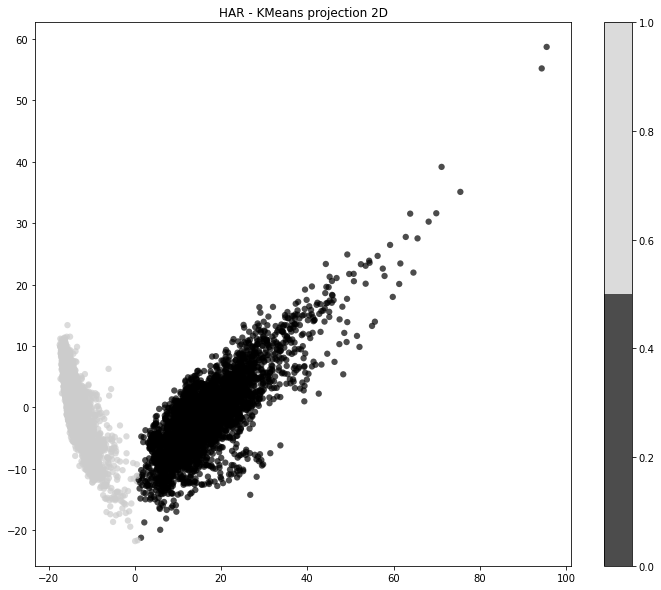

In [372]:
# Graficamos los primeros dos componentes - clusters id
plt.figure(figsize=(12,10))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster2_labels_mov, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 2))
plt.colorbar()
plt.title('HAR - KMeans projection 2D');

**Explique. ¿Cuál fue la ganancia de usar PCA en conjunto con k-means?**

La ganancia fue que PCA disminuyó la dimensionalidad y a visualizar los datos, esto porque permite graficar las componentes que en este caso cubren el 80% de explicabilidad de la varianza, a partir de este gráfico se observa los datos a qué clase pertenecen. 

Con este trabajo realizado, KMeans genera k puntos de corte de acuerdo a los clusteres que se definan, con este trabajo podemos obtener una separación de las clases en el conjunto de datos.

En este ejemplo KMeans nos ayudo a separar los grupos de datos.

En conclusión, PCA permite visualizar las clases de las componentes, mientras el desarrollador con esa visualización usa KMeans para comprender la cantidad de clusteres por los cuales puede segmentar los datos de las componentes y así obtener una agrupación de los datos de acuerdo a los grupos que se definan en k.

##### MNIST

In [373]:
X_train, y_train= load_digits(return_X_y=True)
print('Formato del dataset: {}'.format(X_train.shape))

Formato del dataset: (1797, 64)


In [374]:
# Aplicar PCA (validar que se cumplan las condiciones), ¿Cuántas componentes necesitamos para explicar el 80% de la varianza?

#validar que se cumplan las condiciones:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

#¿Cuántas componentes necesitamos para explicar el 80% de la varianza?
pca = PCA(n_components=0.8, random_state=RANDOM_STATE).fit(X_scaled)
X_pca = pca.transform(X_scaled)

In [375]:
X_pca.shape

(1797, 21)

In [376]:
# Cantidad de componentes necesarios
X_pca.shape[1]

21

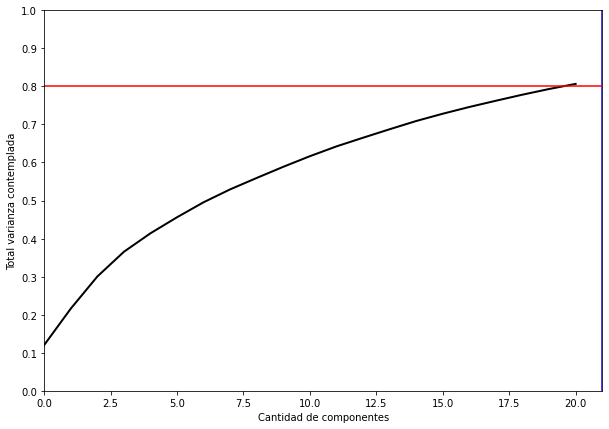

In [377]:
#Gráficar la variación acumulada para cada caso.
pca_2 = PCA(n_components=21, random_state=RANDOM_STATE).fit(X_scaled)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca_2.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Cantidad de componentes')
plt.ylabel('Total varianza contemplada')
plt.xlim(0, 21)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(21, c='b')
plt.axhline(0.8, c='r')
plt.show();

In [378]:
#KMeans k=10
kmeans_move = KMeans(n_clusters=10, n_init=100, random_state=RANDOM_STATE)
kmeans_move.fit(X_pca)
cluster10_labels_mov = kmeans_move.labels_

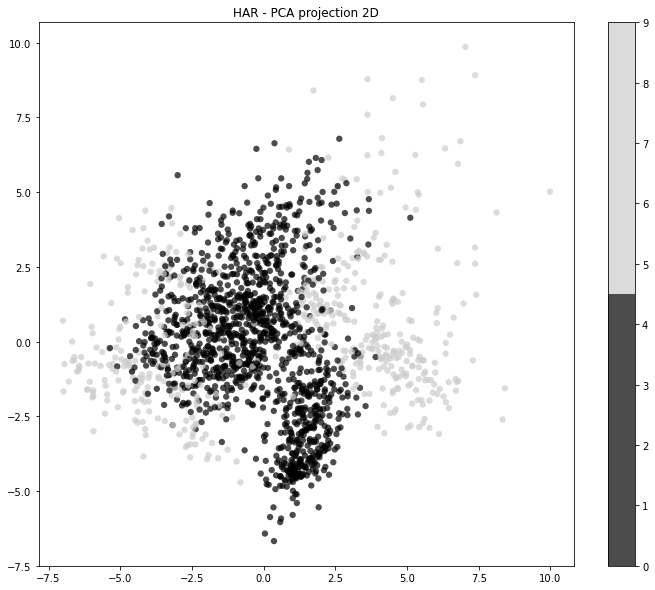

In [379]:
#Graficar los resultados con los distintos k's usando las primeras dos componentes principales como ejes x,y.
# Graficamos los primeros dos componentes - clusters id
plt.figure(figsize=(12,10))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster10_labels_mov, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 2))
plt.colorbar()
plt.title('HAR - PCA projection 2D');

In [380]:
tab = pd.crosstab(y_train, cluster10_labels_mov, margins=True)
tab.index = ['Cero','Uno', 'Dos', 'Tres', 'Cuatro', 'Cinco', 'Seis', 'Siete', 'Ocho', 'Nueve','Todos']
tab.columns = ['cluster ' + str(i + 0) for i in range(10)] + ['Todos']
tab

,cluster 0,cluster 1,cluster 2,cluster 3,cluster 4,cluster 5,cluster 6,cluster 7,cluster 8,cluster 9,Todos
Cero,177,0,0,0,0,1,0,0,0,0,178
Uno,0,96,1,0,0,0,27,0,0,58,182
Dos,0,36,2,0,4,0,52,77,0,6,177
Tres,0,9,8,0,151,0,2,13,0,0,183
Cuatro,0,4,4,0,0,157,0,0,9,7,181
Cinco,0,61,2,3,70,2,0,42,0,2,182
Seis,1,5,0,174,0,0,0,0,0,1,181
Siete,0,0,150,0,0,0,0,8,18,3,179
Ocho,0,97,3,3,47,0,0,8,0,16,174
Nueve,0,5,8,0,145,0,0,0,3,19,180


In [381]:
#KMeans k=2
kmeans_move = KMeans(n_clusters=2, n_init=100, random_state=RANDOM_STATE)
kmeans_move.fit(X_pca)
cluster2_labels_mov = kmeans_move.labels_

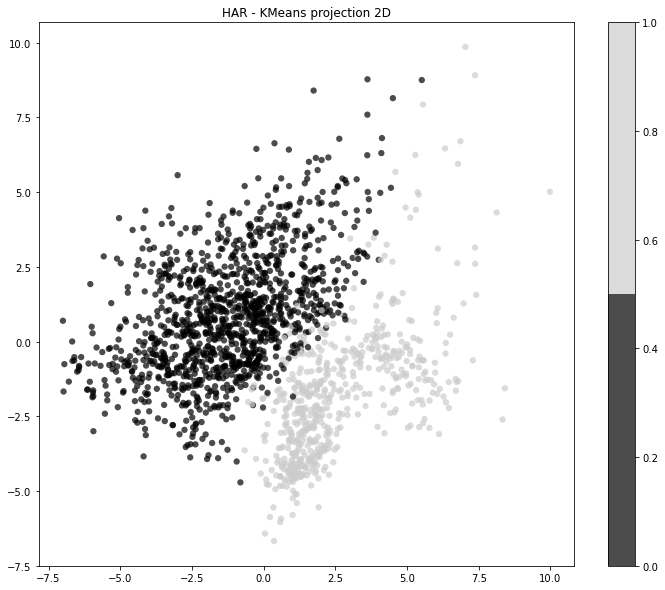

In [382]:
# Graficamos los primeros dos componentes - clusters id
plt.figure(figsize=(12,10))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster2_labels_mov, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 2))
plt.colorbar()
plt.title('HAR - KMeans projection 2D');

In [383]:
tab = pd.crosstab(y_train, cluster2_labels_mov, margins=True)
tab.index = ['Cero','Uno', 'Dos', 'Tres', 'Cuatro', 'Cinco', 'Seis', 'Siete', 'Ocho', 'Nueve','Todos']
tab.columns = ['cluster ' + str(i + 0) for i in range(2)] + ['Todos']
tab

,cluster 0,cluster 1,Todos
Cero,0,178,178
Uno,179,3,182
Dos,176,1,177
Tres,180,3,183
Cuatro,5,176,181
Cinco,169,13,182
Seis,1,180,181
Siete,167,12,179
Ocho,169,5,174
Nueve,171,9,180


In [384]:
#KMeans k=3
kmeans_move = KMeans(n_clusters=3, n_init=100, random_state=RANDOM_STATE)
kmeans_move.fit(X_pca)
cluster3_labels_mov = kmeans_move.labels_

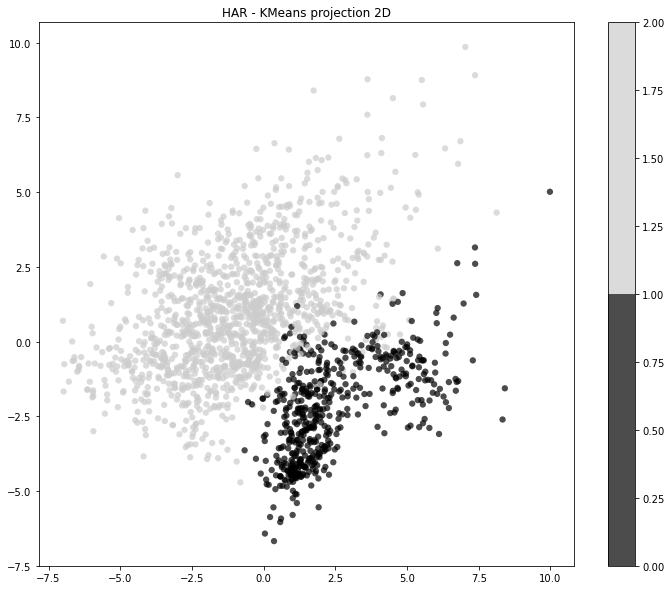

In [385]:
# Graficamos los primeros dos componentes - clusters id
plt.figure(figsize=(12,10))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster3_labels_mov, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 2))
plt.colorbar()
plt.title('HAR - KMeans projection 2D');

In [386]:
tab = pd.crosstab(y_train, cluster3_labels_mov, margins=True)
tab.index = ['Cero','Uno', 'Dos', 'Tres', 'Cuatro', 'Cinco', 'Seis', 'Siete', 'Ocho', 'Nueve','Todos']
tab.columns = ['cluster ' + str(i + 0) for i in range(3)] + ['Todos']
tab

,cluster 0,cluster 1,cluster 2,Todos
Cero,178,0,0,178
Uno,0,155,27,182
Dos,0,14,163,177
Tres,3,14,166,183
Cuatro,145,35,1,181
Cinco,11,57,114,182
Seis,176,5,0,181
Siete,0,173,6,179
Ocho,1,109,64,174
Nueve,3,35,142,180


**Explique. ¿Cuál fue la ganancia de usar PCA en conjunto con k-means?**

Para este ejercicio la ganancia de usar PCA fue que se logró determinar las componentes que representan la variabilidad de los datos en un 80%, esto nos permitío reducir dimensiones de las variables sin eliminar una exclusivamente, razón por la cual estas componentes de PCA representan el 80% de nuestros datos originales. Apartir del conocimiento de las componentes, nos servimos del conocimiento de estas para a través de las clases de los datos formar agrupamientos entre numeros similares. De estos se disgrega que a partir con k=10 los clusteres van disminuyendo drasticamente su capacidad de separacion de los datos. No obstante, aunque no es muy intuitivo la segmentacion de grupos que hizo k=2 , se pudo constatar a traves del crosstab que k=2 es la mejor representación de los agripamientos de los objetos(digitos). También se corroboro que aunque k=3 a traves de la gráfica se observa mejor diferenciacion de los grupos formados, esto es desmentido a través del crosstab. De lo anterior se esgrime que el crosstab es una herramienta importante de comprobación de la capacidad de agrupamiento de cada cluster.

## Segunda Parte (Clase 3 y 4)

In [387]:
import matplotlib.pyplot as plt
import seaborn as sns

# Entrenamiento de modelos de prueba
from sklearn.linear_model import LinearRegression

# Evaluación de modelos de prueba
from sklearn.metrics import mean_squared_error

# Crear datasets
from sklearn.datasets import make_regression

Vamos a crear un dataset sintetico utilizando las librerias de [Sklearn Datasets](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html), en particular nos interesa crear un problema de regresion
lineal al que podemos variarle sus parametros

In [388]:
# Creamos un dataset de prueba
X, y = make_regression(n_samples = 1000,
                       n_features = 1,
                       noise = 2,
                       n_informative = 1,
                       random_state = 42)

new_data = np.append(X,y.reshape(-1,1),axis=1)
new_data.shape

(1000, 2)

In [389]:
df = pd.DataFrame(new_data)

new_col = []
i = 0
for col in df.columns:
    if i ==  len(df.columns) - 1:
        new_col.append("target")
    else :
        new_col.append("feature_" + str(i+1))
        
    i += 1
    
df.columns = new_col

df.head()

,feature_1,target
0,-1.758739,-30.118736
1,1.031845,14.526197
2,-0.487606,-10.119305
3,0.186454,1.700188
4,0.725767,12.345314


In [390]:
df.shape

(1000, 2)

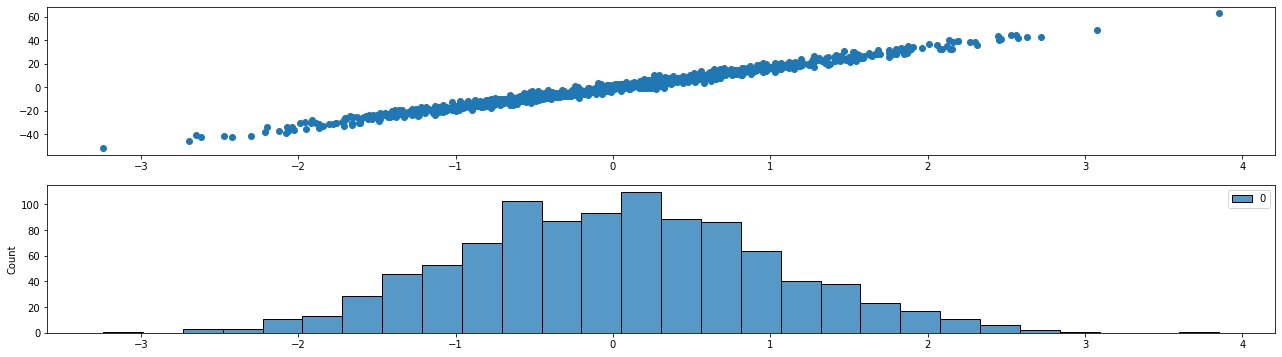

In [391]:
fig,axes = plt.subplots(2,figsize=(22,6))
axes[0].scatter(X,y)
sns.histplot(X, ax=axes[1]);

c:\Users\yessrandy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


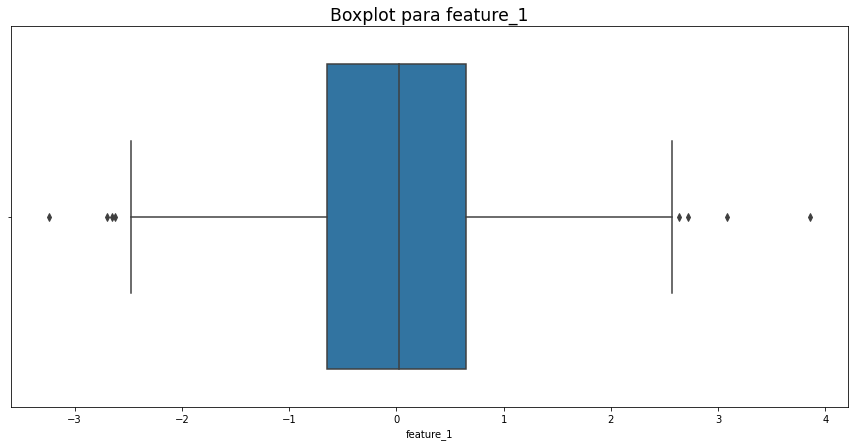

In [392]:
plt.figure(figsize=(15,7))
sns.boxplot(df.feature_1)
plt.title('Boxplot para feature_1', fontsize='xx-large');
plt.show()

### Funciones auxiliares para generar datos anómalos

In [393]:
def generate_outliers(df: pd.DataFrame,
                     cols: list = None,
                     extreme_outlier: bool = False,
                     two_tailed: bool = False,
                     percentage: float = 0.02) -> pd.DataFrame:
  """Con esta función vamos a poder generar outliers en ciertas columnas de nuestro
  dataset. Si le damos True a _extreme_outlier_ va a generar outliers con mucho
  peso en la regresión (puede ser bilateral o unilateral segun _two_tailed_)
  """  
  seeds = np.random.randint(100, size = len(df))
  
  nsamples = np.math.floor(len(df) * percentage)
  idx_to_change = df.sample(n = nsamples).index

  cols = df.columns.tolist() if cols is None else cols

  result = df.copy(deep = True)
  
  for i,col_name in enumerate(cols):
    np.random.seed(seeds[i])

    iqr = result[col_name].quantile(0.75) - result[col_name].quantile(0.25)

    lb = result[col_name].quantile(0.25) - 1 * iqr
    ub = result[col_name].quantile(0.75) + 1 * iqr

    if two_tailed:
      outs = result[col_name].loc[(result[col_name] < lb) | (result[col_name] > ub)]
    else:
      outs = result[col_name].loc[(result[col_name] > ub)]
    
    out_size = len(outs)
    if out_size < nsamples:
      nsamples = out_size

    idx_to_change = outs.sample(nsamples, replace = False).index
    
    if extreme_outlier:
      outlier_sign = [1 if np.random.random() < 0.9 else -1 for _ in range(nsamples)]
      
      result[col_name].loc[idx_to_change] = np.multiply(outlier_sign,
                                                        np.random.uniform(low = result[col_name].mean(),
                                                                          high = result[col_name].max()*5,
                                                                          size = nsamples)
                                                        )
      result['target'].loc[idx_to_change] = np.multiply(outlier_sign,
                                                        np.random.uniform(low = result['target'].mean(),
                                                                          high = result['target'].max()*2,
                                                                          size = nsamples)
                                                        )
    else:
      samples = result[col_name].loc[idx_to_change].values
      np.random.shuffle(samples)
      result[col_name].loc[idx_to_change] = samples
  
  return result

In [394]:
df_outlier = generate_outliers(df,['feature_1'], percentage = 0.05, extreme_outlier = True, two_tailed= True)

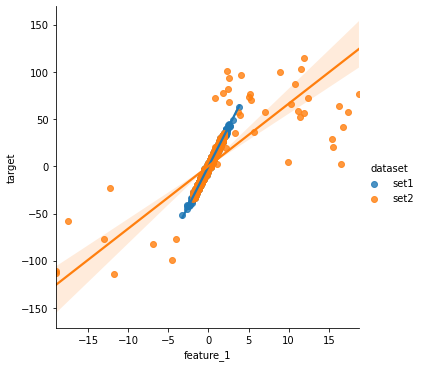

In [395]:
sns.lmplot(data = pd.concat([df.assign(dataset = 'set1'),
                                 df_outlier.assign(dataset = 'set2')]),
                x = 'feature_1',
                y = 'target',
                hue = 'dataset')

c:\Users\yessrandy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


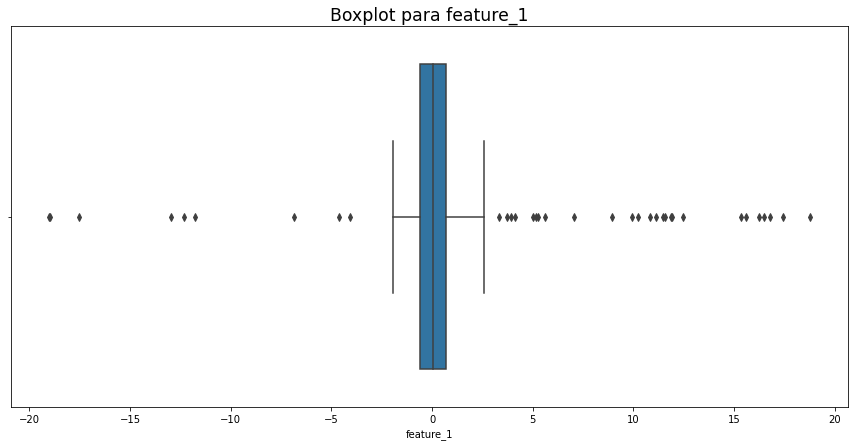

In [396]:
plt.figure(figsize=(15,7))
sns.boxplot(df_outlier.feature_1)
plt.title('Boxplot para feature_1', fontsize='xx-large');
plt.show()

### Quinto ejercicio

Crear una función que separe los datos en train-validation-test 70-20-10


Hints: 

* Usar Indexing y slicing
* Usar np.random.[...]

In [397]:
def split(df: pd.DataFrame, train_size: float):
    df_list = list(df.columns.values)

    X = df[df_list[0]]
    y = df[df_list[1]]

    train_percentage = 0.7
    validation_percentage = 1 - 0.7 - 0.1

    test_indexes_start = int((train_percentage + validation_percentage) * X.shape[0])

    permuted_indexes = np.random.permutation(X.shape[0])

    train_indexes = permuted_indexes[0:int(train_percentage * X.shape[0])]
    validation_indexes = permuted_indexes[int(train_percentage * X.shape[0]):test_indexes_start]
    test_indexes = permuted_indexes[test_indexes_start:X.shape[0]]

    X_train = X[train_indexes]
    X_val = X[validation_indexes]
    X_test = X[test_indexes]

    Y_train = y[train_indexes]
    Y_val = y[validation_indexes]
    Y_test = y[test_indexes]
    return X_train, X_val, X_test, Y_train, Y_val, Y_test

In [398]:
(X_train, X_val, X_test, Y_train, Y_val, Y_test) = split(df, 0.7)


In [399]:
X_train.shape

(700,)

In [400]:
X_val.shape

(200,)

In [401]:
X_test.shape

(100,)

### Sexto ejercicio

Utilizando la funcion `generate_outliers` generar puntos extremos dentro de los datos que generamos anteriormente. En este ejercicio dejar setteado `extreme_outliers` como `False` y observe como variando el porcentaje de los mismos la regresión comienza a afectarse.

In [402]:
df_outlier_outlayer_false = generate_outliers(df,['feature_1'], percentage = 0.05, extreme_outlier = False, two_tailed= True)

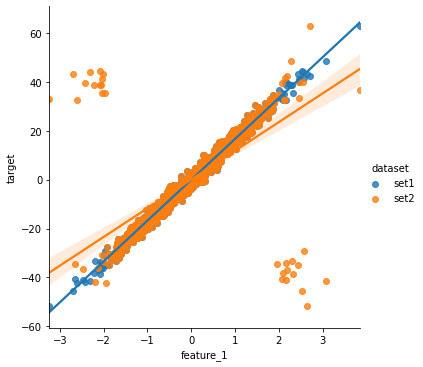

In [403]:
sns.lmplot(data = pd.concat([df.assign(dataset = 'set1'),
                                 df_outlier_outlayer_false.assign(dataset = 'set2')]),
                x = 'feature_1',
                y = 'target',
                hue = 'dataset')

c:\Users\yessrandy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


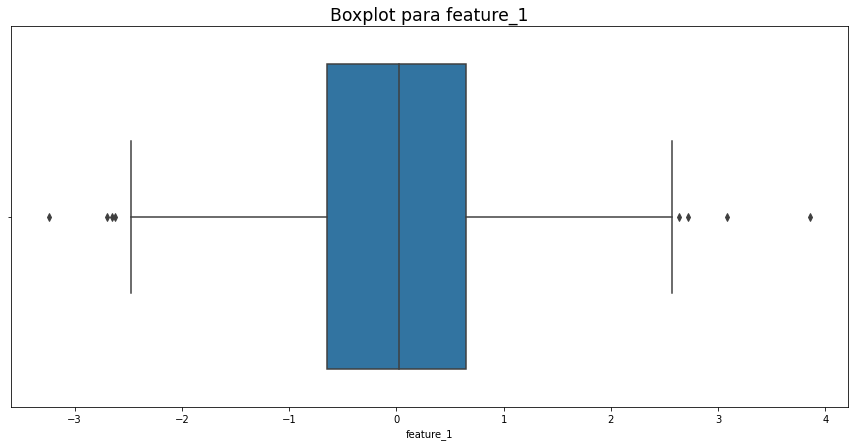

In [404]:
plt.figure(figsize=(15,7))
sns.boxplot(df_outlier_outlayer_false.feature_1)
plt.title('Boxplot para feature_1', fontsize='xx-large');
plt.show()

In [405]:
df_outlier_outlayer_false2 = generate_outliers(df,['feature_1'], extreme_outlier = False, two_tailed= True)

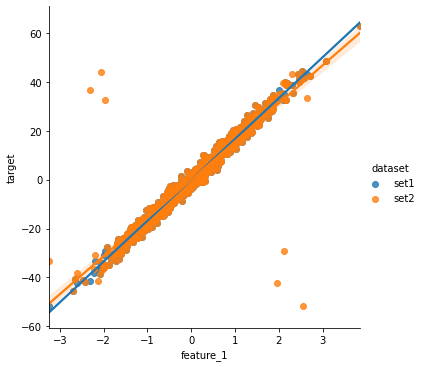

In [406]:
sns.lmplot(data = pd.concat([df.assign(dataset = 'set1'),
                                 df_outlier_outlayer_false2.assign(dataset = 'set2')]),
                x = 'feature_1',
                y = 'target',
                hue = 'dataset')

c:\Users\yessrandy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


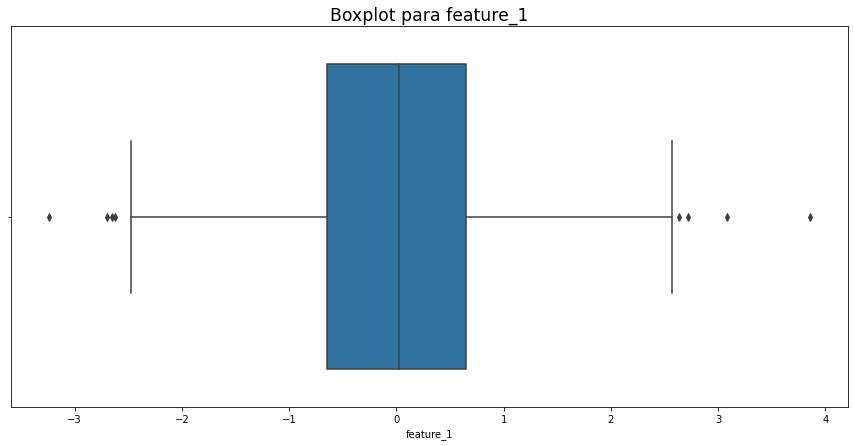

In [407]:
plt.figure(figsize=(15,7))
sns.boxplot(df_outlier_outlayer_false2.feature_1)
plt.title('Boxplot para feature_1', fontsize='xx-large');
plt.show()

In [408]:
df_outlier_outlayer_false3 = generate_outliers(df,['feature_1'], percentage = 0.09, extreme_outlier = False, two_tailed= True)

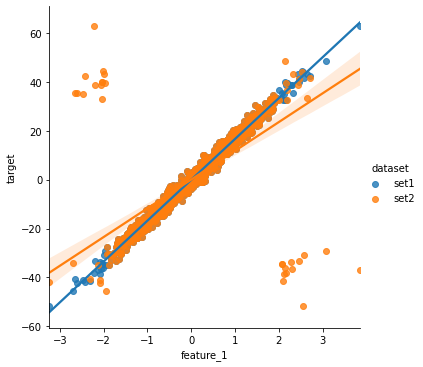

In [409]:
sns.lmplot(data = pd.concat([df.assign(dataset = 'set1'),
                                 df_outlier_outlayer_false3.assign(dataset = 'set2')]),
                x = 'feature_1',
                y = 'target',
                hue = 'dataset')

c:\Users\yessrandy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


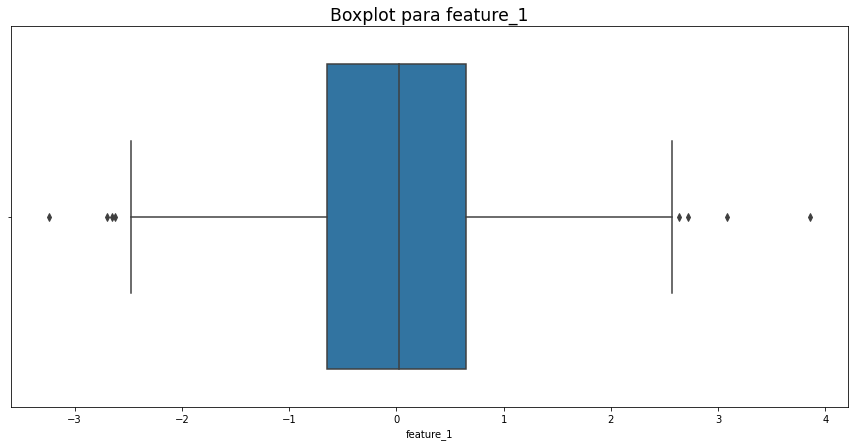

In [410]:
plt.figure(figsize=(15,7))
sns.boxplot(df_outlier_outlayer_false3.feature_1)
plt.title('Boxplot para feature_1', fontsize='xx-large');
plt.show()

## Tercera Parte (Clase 5, 6 y 7)

La ultima parte la van a poder encontrar en el archivo `template_tp_integrador_tercera_parte.ipynb`